<a href="https://colab.research.google.com/github/qghrjf646/Quishing_detection_AI/blob/main/QR_code_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QR Code Phishing Detection with Deep Learning

In this notebook, we explore the detection of QR code phishing, commonly known as "quishing," using deep learning techniques. The dataset utilized is the **[Dataset of 1000 Images of Malicious and Benign QR Codes 2025](https://data.mendeley.com/datasets/cmhh7744sp/1)**, published by Sefiya Galadima from Vivekananda Global University. This dataset comprises 1,000 high-quality QR code images, divided equally between 500 malicious and 500 benign QR codes. The malicious QR codes contain verified phishing or malware distribution URLs, while the benign ones link to trusted domains.

This dataset addresses a critical gap in contemporary cybersecurity research, as most publicly available QR code datasets are significantly outdated and fail to reflect current cyber threat landscapes. Each QR code is generated at a standardized resolution of 330x330 pixels, facilitating consistent processing across different machine learning frameworks. The dataset includes a diverse range of URL structures, encoding densities, and error correction levels to better represent real-world QR code variations.

Researchers can utilize this dataset to train, validate, and test machine learning models for automated QR code threat detection, contributing to improved mobile security solutions in an era of increasing QR code adoption for financial transactions and authentication.

## Dataset Overview

- **Source**: [Dataset of 1000 Images of Malicious and Benign QR Codes 2025](https://data.mendeley.com/datasets/cmhh7744sp/1)
- **Published by**: Sefiya Galadima, Vivekananda Global University
- **Categories**: Machine Learning, Image Classification, Convolutional Neural Network
- **License**: CC BY 4.0

## Objective

The primary objective of this project is to develop a deep learning model capable of distinguishing between malicious and benign QR codes. By leveraging convolutional neural networks (CNNs), we aim to achieve high accuracy in classifying QR codes, thereby enhancing mobile security measures against phishing attacks.

## Significance of QR Code Phishing Detection

QR code phishing, or "quishing," has become a prevalent method for cybercriminals to deceive users into visiting malicious websites or downloading malware. Unlike traditional phishing attacks that rely on deceptive emails or links, quishing utilizes the convenience and trust associated with QR codes to bypass security measures. Detecting such threats is crucial to prevent unauthorized access to sensitive information and ensure user safety in digital transactions.

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import os
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Extracting data and preparing files

In [2]:
%%bash
unrar x '/content/1000 QR Images of Malicious and Benign QR codes.rar'


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/1000 QR Images of Malicious and Benign QR codes.rar

Creating    1000 QR Images of Malicious and Benign QR codes 2025      OK
Creating    1000 QR Images of Malicious and Benign QR codes 2025/benign_qr_images_500  OK
Extracting  1000 QR Images of Malicious and Benign QR codes 2025/benign_qr_images_500/qr_0_benign_images.png       0%  OK 
Extracting  1000 QR Images of Malicious and Benign QR codes 2025/benign_qr_images_500/qr_100_benign_images.png       0%  OK 
Extracting  1000 QR Images of Malicious and Benign QR codes 2025/benign_qr_images_500/qr_101_benign_images.png       0%  OK 
Extracting  1000 QR Images of Malicious and Benign QR codes 2025/benign_qr_images_500/qr_102_benign_images.png       0%  OK 
Extracting  1000 QR Images of Malicious and Benign QR codes 2025/benign_qr_images_500/qr_103_benign_images.png       0%  OK 
Extracting  100

# Data exploration

In [3]:
# Seed
torch.manual_seed(75)

In [28]:
# Loading PNG images from a folders into tensors

image_directory = "/content/1000 QR Images of Malicious and Benign QR codes 2025"

image_transforms = transforms.Compose([
      transforms.Resize((330, 330)), # Resize images to a consistent size
      transforms.ToTensor(),         # Convert PIL Image or NumPy array to PyTorch Tensor
  ])

image_dataset = datasets.ImageFolder(root=image_directory, transform=image_transforms)
image_trainset, image_testset = train_test_split(image_dataset, test_size=0.1, random_state=42)

batch_size = 32
image_loader = DataLoader(image_trainset, batch_size=batch_size, shuffle=True)

test_loader = DataLoader(image_testset, batch_size=batch_size, shuffle=False)

torch.Size([32, 3, 330, 330])
tensor([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
        0, 0, 0, 1, 1, 1, 0, 0])
torch.Size([3, 330, 330])
tensor([0.0000, 0.0039, 0.0078, 0.0118, 0.0196, 0.0235, 0.0353, 0.0392, 0.0431,
        0.0471, 0.0510, 0.0549, 0.0588, 0.0627, 0.0667, 0.0706, 0.0745, 0.0784,
        0.0824, 0.0863, 0.0902, 0.0941, 0.0980, 0.1020, 0.1059, 0.1137, 0.1176,
        0.1255, 0.1294, 0.1333, 0.1373, 0.1412, 0.1451, 0.1490, 0.1608, 0.1647,
        0.1686, 0.1725, 0.1765, 0.1804, 0.1843, 0.1882, 0.1922, 0.2000, 0.2118,
        0.2157, 0.2196, 0.2235, 0.2275, 0.2314, 0.2392, 0.2431, 0.2471, 0.2588,
        0.2627, 0.2667, 0.2706, 0.2745, 0.2784, 0.2824, 0.2902, 0.2941, 0.2980,
        0.3059, 0.3137, 0.3176, 0.3255, 0.3333, 0.3412, 0.3451, 0.3490, 0.3529,
        0.3569, 0.3647, 0.3686, 0.3804, 0.3843, 0.3882, 0.3922, 0.3961, 0.4000,
        0.4039, 0.4078, 0.4118, 0.4157, 0.4196, 0.4235, 0.4314, 0.4353, 0.4392,
        0.4431, 0.4510, 0.4549,

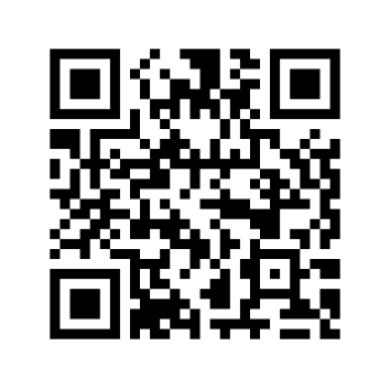

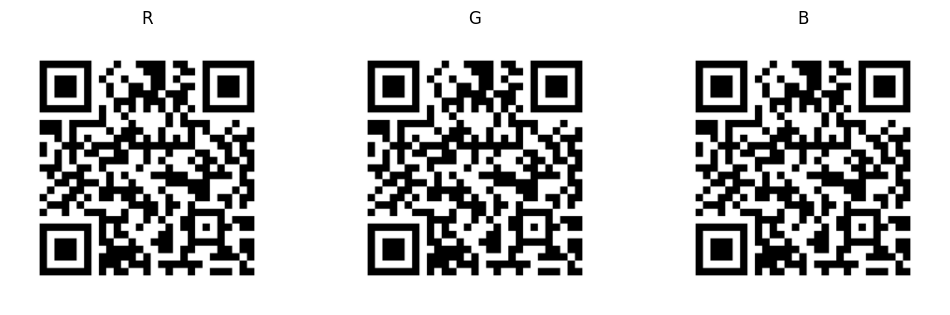

True

In [5]:
# Checking a sample

images, labels = next(iter(test_loader)) # Using the test set for observation since it's not shuffled
print(images.shape)
print(labels) # Since the benign directory is first, 0 is benign and 1 is malicious

img = images[14]
#print(img)
print(img.shape)
#print(f'{len(img[img == 0.0])/(img.shape[0]*img.shape[1]*img.shape[2])}%')
unique_vals = torch.unique(img)
print(unique_vals)

to_pil = transforms.ToPILImage()
plt.imshow(to_pil(img))
plt.axis("off")
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
for i, channel in enumerate(["R", "G", "B"]):
    axs[i].imshow(img[i], cmap="gray")
    axs[i].set_title(channel)
    axs[i].axis("off")
plt.show()
torch.equal(img[0], img[1]) and torch.equal(img[0], img[2])

## Observation notes
- Although QR codes are binary data, the PNG format likely stored them as grayscale (0–255), then ToTensor() downscaled them to [0,1] (1/255=0.0039).
- The outer boundary does contain relevant information so padding in the convolution layers is necessary.
- We have a grayscale image but with 3 channels, which adds redundant data. So we can reload the images but with only channel. Because for now we're not using another pretrained model.

torch.Size([32, 1, 330, 330])
tensor([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
        0, 0, 0, 1, 1, 1, 0, 0])
torch.Size([1, 330, 330])
tensor([0.0000, 0.0039, 0.0078, 0.0118, 0.0196, 0.0235, 0.0353, 0.0392, 0.0431,
        0.0471, 0.0510, 0.0549, 0.0588, 0.0627, 0.0667, 0.0706, 0.0745, 0.0784,
        0.0824, 0.0863, 0.0902, 0.0941, 0.0980, 0.1020, 0.1059, 0.1137, 0.1176,
        0.1255, 0.1294, 0.1333, 0.1373, 0.1412, 0.1451, 0.1490, 0.1608, 0.1647,
        0.1686, 0.1725, 0.1765, 0.1804, 0.1843, 0.1882, 0.1922, 0.2000, 0.2118,
        0.2157, 0.2196, 0.2235, 0.2275, 0.2314, 0.2392, 0.2431, 0.2471, 0.2588,
        0.2627, 0.2667, 0.2706, 0.2745, 0.2784, 0.2824, 0.2902, 0.2941, 0.2980,
        0.3059, 0.3137, 0.3176, 0.3255, 0.3333, 0.3412, 0.3451, 0.3490, 0.3529,
        0.3569, 0.3647, 0.3686, 0.3804, 0.3843, 0.3882, 0.3922, 0.3961, 0.4000,
        0.4039, 0.4078, 0.4118, 0.4157, 0.4196, 0.4235, 0.4314, 0.4353, 0.4392,
        0.4431, 0.4510, 0.4549,

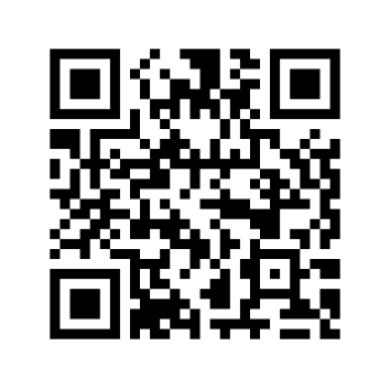

In [6]:
# New transform

image_transforms = transforms.Compose([
    transforms.Grayscale(num_output_channels=1), # keep only 1 channel
    transforms.Resize((330, 330)),
    transforms.ToTensor()
])

image_dataset = datasets.ImageFolder(root=image_directory, transform=image_transforms)
image_trainset, image_testset = train_test_split(image_dataset, test_size=0.1, random_state=42)

batch_size = 32
image_loader = DataLoader(image_trainset, batch_size=batch_size, shuffle=True)

test_loader = DataLoader(image_testset, batch_size=batch_size, shuffle=False)

images, labels = next(iter(test_loader))
print(images.shape)
print(labels)

img = images[14]
print(img.shape)
unique_vals = torch.unique(img)
print(unique_vals)

to_pil = transforms.ToPILImage()
plt.imshow(to_pil(img), cmap="gray")
plt.axis("off")
plt.show()

We get the same image and we only have 1 channel.

torch.Size([1, 330, 330])
tensor([0., 1.])


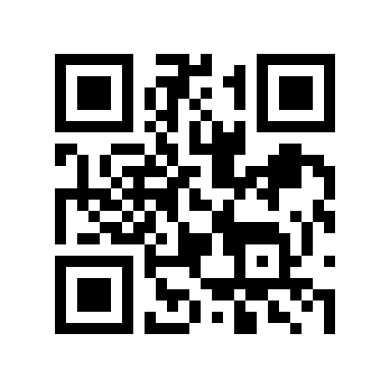

In [7]:
# Plot twist

img = images[0]
print(img.shape)
unique_vals = torch.unique(img)
print(unique_vals)

to_pil = transforms.ToPILImage()
plt.imshow(to_pil(img), cmap="gray")
plt.axis("off")
plt.show()

It's binary. So let's make one last transform and make them all binary to have a consistent distribution for our neural network.

torch.Size([32, 1, 330, 330])
tensor([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
        0, 0, 0, 1, 1, 1, 0, 0])
torch.Size([1, 330, 330])
tensor([0., 1.])


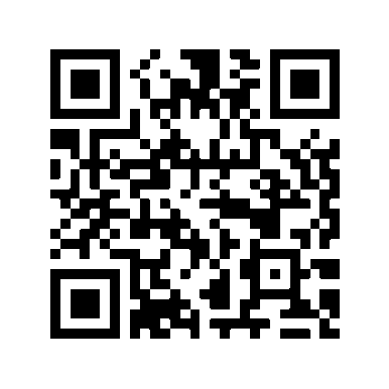

torch.Size([1, 330, 330])
tensor([0., 1.])


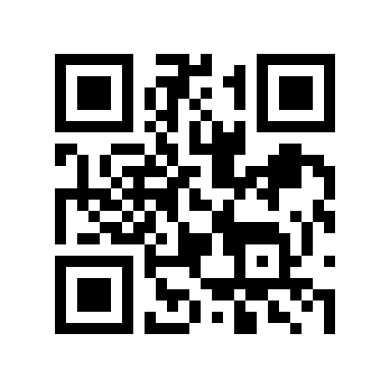

In [5]:
# Final data loading

image_directory = "/content/1000 QR Images of Malicious and Benign QR codes 2025"

image_transforms = transforms.Compose([
    transforms.Grayscale(num_output_channels=1), # keep only 1 channel
    transforms.Resize((330, 330)),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: (x > 0.5).float())  # force 0/1
])

image_dataset = datasets.ImageFolder(root=image_directory, transform=image_transforms)
image_trainset, image_testset = train_test_split(image_dataset, test_size=0.1, random_state=42)

batch_size = 32
image_loader = DataLoader(image_trainset, batch_size=batch_size, shuffle=True)

test_loader = DataLoader(image_testset, batch_size=batch_size, shuffle=False)

images, labels = next(iter(test_loader))
print(images.shape)
print(labels)

img1 = images[14]
print(img1.shape)
unique_vals = torch.unique(img1)
print(unique_vals)

to_pil = transforms.ToPILImage()
plt.imshow(to_pil(img1), cmap="gray")
plt.axis("off")
plt.show()


img2 = images[0]
print(img2.shape)
unique_vals = torch.unique(img2)
print(unique_vals)

to_pil = transforms.ToPILImage()
plt.imshow(to_pil(img2), cmap="gray")
plt.axis("off")
plt.show()

Good to go.

# Building an initial model

In [15]:
# Defining a CNN with 2 convolution layers, max_pooling and 2 fully connected layers and relu as the only activation function

class Classification_Conv_NN(nn.Module):
  def __init__(self):
    super(Classification_Conv_NN, self).__init__()
    self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
    self.fc1 = nn.Linear(64 * 82 * 82, 128)
    self.fc2 = nn.Linear(128, 1)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 64 * 82 * 82)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

In [16]:
model = Classification_Conv_NN()

In [17]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [18]:
model

Classification_Conv_NN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=430336, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=1, bias=True)
)

In [19]:
# Setting torch device

print(torch.cuda.is_available())
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

True


Classification_Conv_NN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=430336, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=1, bias=True)
)

In [22]:
# Training

# Defining variables
epochs = 20
losses = []

# Training loop
for epoch in range(epochs):
    for batch_idx, (images, labels) in enumerate(image_loader):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs.squeeze(), labels.float())
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

Epoch 1/20, Loss: 0.0005688160308636725
Epoch 2/20, Loss: 0.021817823871970177
Epoch 3/20, Loss: 0.012165374122560024
Epoch 4/20, Loss: 0.0021253309678286314
Epoch 5/20, Loss: 0.006041765213012695
Epoch 6/20, Loss: 0.03839884325861931
Epoch 7/20, Loss: 0.032736219465732574
Epoch 8/20, Loss: 0.005726414732635021
Epoch 9/20, Loss: 0.0016356866108253598
Epoch 10/20, Loss: 0.009506940841674805
Epoch 11/20, Loss: 1.9698542018886656e-05
Epoch 12/20, Loss: 0.00012215111928526312
Epoch 13/20, Loss: 0.0002838151704054326
Epoch 14/20, Loss: 1.908133071992779e-06
Epoch 15/20, Loss: 0.000182852047146298
Epoch 16/20, Loss: 0.0005585038452409208
Epoch 17/20, Loss: 0.005993418861180544
Epoch 18/20, Loss: 1.1647688124064286e-14
Epoch 19/20, Loss: 0.00012547052756417543
Epoch 20/20, Loss: 0.00012782460544258356


In [26]:
# Evaluation

model.eval() # Set the model to evaluation mode

with torch.no_grad(): # Disable gradient calculation
    correct = 0
    false_positives = 0
    total = 0
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        predicted = (outputs.squeeze() > 0.5).long() # Apply threshold and convert to long

        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        false_positives += ((predicted == 1) & (labels == 0)).sum().item()

    accuracy = 100 * correct / total
    false_positive_rate = 100 * false_positives / total
    print(f"Accuracy on the test set: {accuracy:.2f}%")
    print(f"False positive rate: {false_positive_rate:.2f}%")

Accuracy on the test set: 89.00%
False positive rate: 6.00%


# Results evaluation and improvement axes
- The achieved accuracy of 89% which is good but there's room for improvement.
- More importantly, we have 6% of false positives which could be dangerous given that our goal is to avoid following malicious QR codes links.
- QR codes are made of Data Modules, Alignment Markers, Finder Patterns, Seperators and finally Error Correction patterns. Given this information, the patterns that we need our convolution layers to pick up are lines, squares of different sizes and random small patterns of all black or all white pixels.
- Kernels are squares, so to identify these patterns we will project on a "small squares" latent space, then into a "bigger squares" one that will form patterns with combinations of the smaller squares.

In [53]:
class Improved_Conv_NN(nn.Module):
  def __init__(self):
    super(Improved_Conv_NN, self).__init__()
    self.conv1 = nn.Conv2d(1, 8, kernel_size=2, stride=1, padding=1)
    self.conv2 = nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1)
    self.conv3 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
    self.fc1 = nn.Linear(32 * 41 * 41, 16)
    self.fc2 = nn.Linear(16, 8)
    self.fc3 = nn.Linear(8, 1)

  def forward(self, x):
    x = F.relu(self.pool(self.conv1(x)))
    x = F.relu(self.pool(self.conv2(x)))
    x = F.relu(self.pool(self.conv3(x)))
    x = x.view(x.size(0), -1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [62]:
# Preparing the model

model = Improved_Conv_NN()
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

Improved_Conv_NN(
  (conv1): Conv2d(1, 8, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=53792, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=1, bias=True)
)

In [63]:
print(model)

Improved_Conv_NN(
  (conv1): Conv2d(1, 8, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=53792, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=1, bias=True)
)


In [64]:
# Training

# Defining variables
epochs = 40
losses = []

# Training loop
for epoch in range(epochs):
    for batch_idx, (images, labels) in enumerate(image_loader):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs.squeeze(), labels.float())
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

Epoch 1/40, Loss: 0.8377065062522888
Epoch 2/40, Loss: 0.28205037117004395
Epoch 3/40, Loss: 0.2122979760169983
Epoch 4/40, Loss: 0.11280186474323273
Epoch 5/40, Loss: 0.674254834651947
Epoch 6/40, Loss: 0.6168686151504517
Epoch 7/40, Loss: 0.15478819608688354
Epoch 8/40, Loss: 0.556549072265625
Epoch 9/40, Loss: 0.7008591890335083
Epoch 10/40, Loss: 0.16514775156974792
Epoch 11/40, Loss: 0.6287394762039185
Epoch 12/40, Loss: 0.6359436511993408
Epoch 13/40, Loss: 0.03507425636053085
Epoch 14/40, Loss: 0.1081513911485672
Epoch 15/40, Loss: 0.03398940712213516
Epoch 16/40, Loss: 0.12123694270849228
Epoch 17/40, Loss: 0.1424192488193512
Epoch 18/40, Loss: 0.026183443143963814
Epoch 19/40, Loss: 0.19500963389873505
Epoch 20/40, Loss: 0.3676961660385132
Epoch 21/40, Loss: 0.689906120300293
Epoch 22/40, Loss: 0.3912684917449951
Epoch 23/40, Loss: 0.2300163060426712
Epoch 24/40, Loss: 0.12980437278747559
Epoch 25/40, Loss: 0.0008261434850282967
Epoch 26/40, Loss: 0.11426991969347
Epoch 27/40,

In [65]:
# Evaluation

model.eval() # Set the model to evaluation mode

with torch.no_grad(): # Disable gradient calculation
    correct = 0
    false_positives = 0
    total = 0
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        predicted = (outputs.squeeze() > 0.5).long() # Apply threshold and convert to long

        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        false_positives += ((predicted == 1) & (labels == 0)).sum().item()

    accuracy = 100 * correct / total
    false_positive_rate = 100 * false_positives / total
    print(f"Accuracy on the test set: {accuracy:.2f}%")
    print(f"False positive rate: {false_positive_rate:.2f}%")

Accuracy on the test set: 90.00%
False positive rate: 6.00%


In [66]:
# Save the model
torch.save(model.state_dict(), 'classification_conv_nn.pth')
print("Model saved successfully!")

Model saved successfully!
